In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
data=pd.read_csv("people_wiki.csv")

In [4]:
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...


In [5]:
data['text']

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
59066,olari elts born april 27 1971 in tallinn eston...
59067,scott francis crago born july 26 1963 twin bro...
59068,david william royce cass born 27 march 1962 in...
59069,keith hector elias born february 3 1972 in lac...


In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
data['processed_text'] = data["text"].apply(preprocess_text)

In [8]:
# Apply tokenization using lambda
data['token'] = data['processed_text'].apply(lambda text: word_tokenize(text))

In [9]:
data

,URI,name,text,processed_text,token
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b..."
...,...,...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni..."
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot..."
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,..."
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac..."


In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Directly remove stopwords from the tokenized list
data['token_without_stopwords'] = data['token'].apply(
    lambda tokens: [word for word in tokens if word.lower() not in stop_words]
)


In [11]:
data

,URI,name,text,processed_text,token,token_without_stopwords
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra..."
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac..."
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni...","[olari, elts, born, april, tallinn, estonia, e..."
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot..."
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,...","[david, william, royce, cass, born, march, for..."
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac...","[keith, hector, elias, born, february, lacey, ..."


In [12]:
nltk.download('wordnet', quiet=True)
wordnet_lemmatizer = WordNetLemmatizer()


In [13]:
data['lemmatized_tokens'] = data['token_without_stopwords'].apply(
    lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens]
)

In [14]:
data.iloc[:,3:]

,processed_text,token,token_without_stopwords,lemmatized_tokens
0,digby morrell born october is a former austral...,"[digby, morrell, born, october, is, a, former,...","[digby, morrell, born, october, former, austra...","[digby, morrell, born, october, former, austra..."
1,alfred j lewy aka sandy lewy graduated from un...,"[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,...","[alfred, j, lewy, aka, sandy, lewy, graduated,..."
2,harpdog brown is a singer and harmonica player...,"[harpdog, brown, is, a, singer, and, harmonica...","[harpdog, brown, singer, harmonica, player, ac...","[harpdog, brown, singer, harmonica, player, ac..."
3,franz rottensteiner born in waidmannsfeld lowe...,"[franz, rottensteiner, born, in, waidmannsfeld...","[franz, rottensteiner, born, waidmannsfeld, lo...","[franz, rottensteiner, born, waidmannsfeld, lo..."
4,henry krvits born december in tallinn better k...,"[henry, krvits, born, december, in, tallinn, b...","[henry, krvits, born, december, tallinn, bette...","[henry, krvits, born, december, tallinn, bette..."
...,...,...,...,...
59066,olari elts born april in tallinn estonia is an...,"[olari, elts, born, april, in, tallinn, estoni...","[olari, elts, born, april, tallinn, estonia, e...","[olari, elts, born, april, tallinn, estonia, e..."
59067,scott francis crago born july twin brother to ...,"[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot...","[scott, francis, crago, born, july, twin, brot..."
59068,david william royce cass born march in forest ...,"[david, william, royce, cass, born, march, in,...","[david, william, royce, cass, born, march, for...","[david, william, royce, cass, born, march, for..."
59069,keith hector elias born february in lacey town...,"[keith, hector, elias, born, february, in, lac...","[keith, hector, elias, born, february, lacey, ...","[keith, hector, elia, born, february, lacey, t..."


In [15]:
data['clean_text'] = data['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))

In [16]:
data['clean_text'] = data['clean_text'].apply(lambda text: ' '.join(text.split()[2:]))

In [17]:
data["clean_text"]

,clean_text
0,born october former australian rule footballer...
1,lewy aka sandy lewy graduated university chica...
2,singer harmonica player active canada blue sce...
3,born waidmannsfeld lower austria austria janua...
4,born december tallinn better known stagename g...
...,...
59066,born april tallinn estonia estonian conductor ...
59067,crago born july twin brother jeff crago americ...
59068,royce cass born march forest gate london engli...
59069,elia born february lacey township new jersey f...


In [18]:

vectorizer = TfidfVectorizer()
doc_term_matrix = vectorizer.fit_transform(data["clean_text"])

In [19]:
print(doc_term_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7653293 stored elements and shape (59071, 481093)>
  Coords	Values
  (0, 52140)	0.014990563641540186
  (0, 301902)	0.03439126394030056
  (0, 153045)	0.027794877833731954
  (0, 29554)	0.13706812909024574
  (0, 366210)	0.05270741262494572
  (0, 152144)	0.04974483705272601
  (0, 327896)	0.09003043723105453
  (0, 218896)	0.26218118528652157
  (0, 66549)	0.15029917383037106
  (0, 152105)	0.4194956310080445
  (0, 239078)	0.14453072131026992
  (0, 6262)	0.13316186452759063
  (0, 462846)	0.048129252097250386
  (0, 29413)	0.04523140971136296
  (0, 279600)	0.48083180919673457
  (0, 124089)	0.034511290655871406
  (0, 381118)	0.1160082222620419
  (0, 462744)	0.08474893690956557
  (0, 322154)	0.07116990039885296
  (0, 159985)	0.10139541692336275
  (0, 65835)	0.027033554554401783
  (0, 141563)	0.07661393544079705
  (0, 399375)	0.07696003204106432
  (0, 81935)	0.21943053031268192
  (0, 239014)	0.08325870493176105
  :	:
  (59070, 387315)	0.

In [20]:
lda_model = LatentDirichletAllocation(
            n_components=10,
            random_state=42,
            learning_method='online'
        )
topic_dist = lda_model.fit_transform(doc_term_matrix)

In [21]:
reducer = PCA(n_components=10, random_state=42)  # Reduce to 2D
topic_umap = reducer.fit_transform(topic_dist)

In [22]:
silhouette_scores = []
max_clusters = 15

for n_clusters in range(2, max_clusters + 1):
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                cluster_labels = kmeans.fit_predict(topic_umap)

                # Compute silhouette score
                try:
                    score = silhouette_score(topic_umap, cluster_labels)
                    silhouette_scores.append(score)
                except Exception:
                    silhouette_scores.append(-1)

            # Find optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2



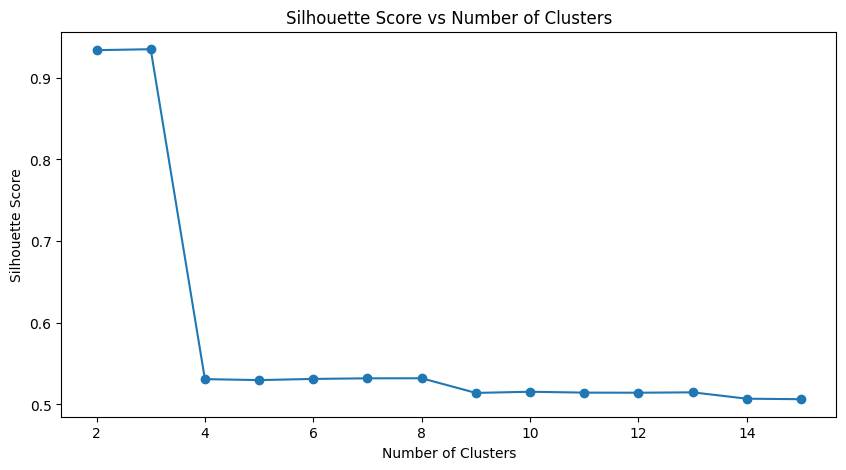

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [24]:
wcss = []  # Within-Cluster Sum of Squares (WCSS)
K = range(2, 15)  # Try clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(topic_umap)
    wcss.append(kmeans.inertia_)

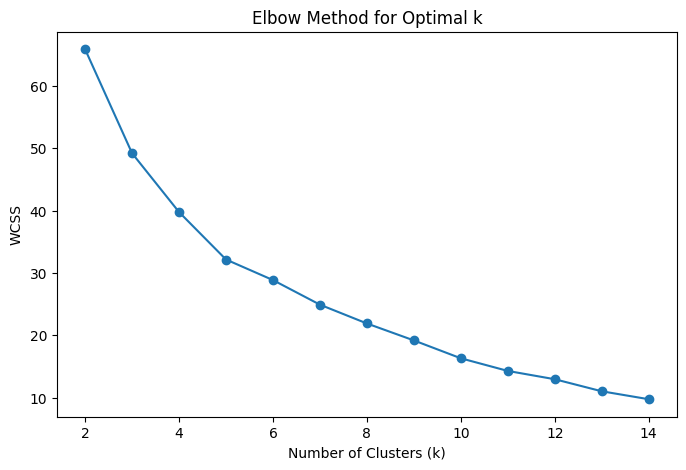

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(topic_umap)

# Step 4: Evaluate using Silhouette Score
silhouette = silhouette_score(topic_umap, clusters)
print(f"K-Means Silhouette Score (UMAP-reduced LDA topics): {silhouette:.4f}")

# Step 5: Store results
data["lda_umap_cluster"] = clusters

K-Means Silhouette Score (UMAP-reduced LDA topics): 0.9351


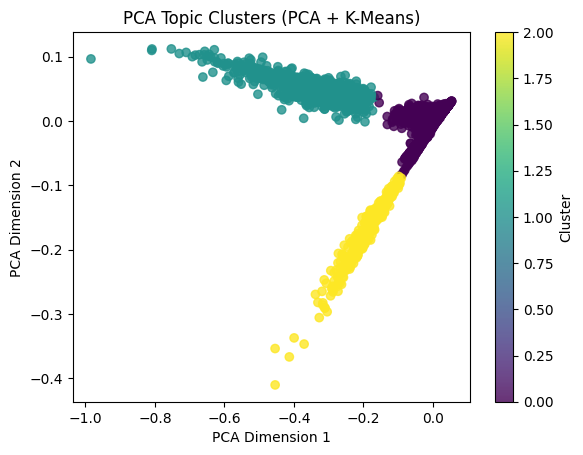

In [27]:
import matplotlib.pyplot as plt

plt.scatter(topic_umap[:, 0], topic_umap[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("PCA Topic Clusters (PCA + K-Means)")
plt.show()